In [1]:
import pandas as pd
import numpy as np
import wptools
import os
import requests
import csv
import datetime as dt
from PIL import Image
from io import BytesIO
import json
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

# Gather

In [2]:
twitter_df = pd.read_csv('twitter-archive-enhanced.csv')
twitter_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
# Make directory if it doesn't already exist
url = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
url.content

b"tweet_id\tjpg_url\timg_num\tp1\tp1_conf\tp1_dog\tp2\tp2_conf\tp2_dog\tp3\tp3_conf\tp3_dog\n666020888022790149\thttps://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg\t1\tWelsh_springer_spaniel\t0.465074\tTrue\tcollie\t0.156665\tTrue\tShetland_sheepdog\t0.0614285\tTrue\n666029285002620928\thttps://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg\t1\tredbone\t0.506826\tTrue\tminiature_pinscher\t0.07419169999999999\tTrue\tRhodesian_ridgeback\t0.07201\tTrue\n666033412701032449\thttps://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg\t1\tGerman_shepherd\t0.596461\tTrue\tmalinois\t0.13858399999999998\tTrue\tbloodhound\t0.11619700000000001\tTrue\n666044226329800704\thttps://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg\t1\tRhodesian_ridgeback\t0.408143\tTrue\tredbone\t0.360687\tTrue\tminiature_pinscher\t0.222752\tTrue\n666049248165822465\thttps://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg\t1\tminiature_pinscher\t0.560311\tTrue\tRottweiler\t0.243682\tTrue\tDoberman\t0.154629\tTrue\n666050758794694657\thttps://pbs.twimg.com/

In [4]:
TSV_URL = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'


with requests.Session() as s:
    download = s.get(TSV_URL)

    decoded_content = download.content.decode('utf-8')

    cr = csv.reader(decoded_content.splitlines(), delimiter='\t')
    my_list = list(cr)
    for row in my_list:
        print(row)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog']
['666020888022790149', 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg', '1', 'Welsh_springer_spaniel', '0.465074', 'True', 'collie', '0.156665', 'True', 'Shetland_sheepdog', '0.0614285', 'True']
['666029285002620928', 'https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg', '1', 'redbone', '0.506826', 'True', 'miniature_pinscher', '0.07419169999999999', 'True', 'Rhodesian_ridgeback', '0.07201', 'True']
['666033412701032449', 'https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg', '1', 'German_shepherd', '0.596461', 'True', 'malinois', '0.13858399999999998', 'True', 'bloodhound', '0.11619700000000001', 'True']
['666044226329800704', 'https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg', '1', 'Rhodesian_ridgeback', '0.408143', 'True', 'redbone', '0.360687', 'True', 'miniature_pinscher', '0.222752', 'True']
['666049248165822465', 'https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg', '1', 'm

In [5]:
df_predictions = pd.DataFrame(my_list)
new_header = df_predictions.iloc[0] #grab the first row for the header
df_predictions = df_predictions[1:] #take the data less the header row
df_predictions.columns = new_header #set the header row as the df header
df_predictions.to_csv('image-predictions.csv', sep='\t',index=False)
df_predictions = pd.read_csv('image-predictions.csv',sep='\t')
df_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [6]:
#NOTE: THIS PEICE OF CODE HAS BEEN INCLUDED AS PER REVIEWER'S REQUEST EVEN THOUGH IT'S NOT FUNCTIONAL

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df_predictions.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    
    #NOTE: THIS LOOP IS COMMENTED BECAUSE IT REQUIRES ALOT OF TIME TO RUN,
    #IF YOU WANT TO MAKE SURE THAT THE API CALLING HAS FAILED DUO TO TWITTER
    #NOT ANSOWRING MY REQUEST TO HAVE ACCESS TO THEIR API FEEL FREE TO UNCOMMENT
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass

    end = timer()
    print(end - start)
    print(fails_dict)



0.00016566500016779173
{}


In [7]:
with open('tweet-json.txt') as file:
    status = []
    for line in file:
        status.append(json.loads(line))

In [8]:
status[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [9]:
df_json = pd.DataFrame(status)

In [10]:
df_json.sample(10)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
776,None,None,Wed Sep 14 16:00:49 +0000 2016,"[0, 113]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 776088309558874112, 'id_str'...",2045,False,I can't tap the screen to make the hearts appe...,None,...,False,NaN,NaN,NaN,179,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
839,None,None,Sat Aug 20 05:08:29 +0000 2016,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,0,False,RT @dog_rates: We only rate dogs... this is a ...,None,...,NaN,NaN,NaN,NaN,6521,False,{'created_at': 'Mon Aug 01 01:28:46 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1840,None,None,Sun Dec 13 02:51:51 +0000 2015,"[0, 144]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675870715636224001, 'id_str'...",1783,False,&amp; this is Yoshi. Another world record cont...,None,...,False,NaN,NaN,NaN,632,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1913,None,None,Tue Dec 08 20:01:55 +0000 2015,"[0, 96]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 674318003345997825, 'id_str'...",1516,False,This is Lennon. He's in quite the predicament....,None,...,False,NaN,NaN,NaN,570,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
805,None,None,Sat Sep 03 16:04:27 +0000 2016,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 772102964165111808, 'id_str'...",4448,False,This is Penny. She's an OU cheerleader. About ...,None,...,False,NaN,NaN,NaN,1065,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
909,None,None,Mon Jul 25 15:26:30 +0000 2016,"[0, 116]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 757596935922515969, 'id_str'...",0,False,RT @jon_hill987: @dog_rates There is a cunning...,None,...,False,NaN,NaN,NaN,336,False,{'created_at': 'Mon Jul 25 15:23:28 +0000 2016...,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1864,None,None,Fri Dec 11 16:20:15 +0000 2015,"[0, 58]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 675349367813877760, 'id_str'...",4237,False,Yea I lied. Here's more. All 13/10 https://t.c...,None,...,False,NaN,NaN,NaN,2532,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1356,None,None,Sat Feb 27 00:55:11 +0000 2016,"[0, 111]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 703382800452493312, 'id_str'...",3837,False,This is Charlie. He's a West Side Niddlewog. M...,None,...,False,NaN,NaN,NaN,1285,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2309,None,None,Wed Nov 18 00:55:42 +0000 2015,"[0, 107]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 666781788895911936, 'id_str'...",404,False,This is a purebred Bacardi named Octaviath. Ca...,None,...,False,NaN,NaN,NaN,211,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1438,None,None,Tue Feb 09 02:40:05 +0000 2016,"[0, 59]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 696886248611381248, 'id_str'...",5317,False,Guys I found the dog from Up. 12/10 https://t....,None,...,False,NaN,NaN,NaN,2016,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",Fals

# Assess

## Quality Issues

- Missing values in all of the tables.(Done)

- Dates should be better changed from 'object' datatype into 'date' datatype.(Done)

- Inconsistency with the denominator values, should be only 10.(Done)

- Problems when extracting the numenator values with decimals in them.(Done)

- Inconsistency with the number of decimals of p1_conf, p2_conf and p3_conf.(Done)

- Retweeted ratings should be removed.(Done)

- tweet_id in twitter_df should be an 'object' rather than an 'integer'.(Done)

- Multiple values in the name column of tweet_id have 'a' or 'an' and other invalid values as names.(Done)

## Tideness Issues

- All the tables should be joined together to easily visulaize insights.(Done)

- The columns of dog types should be concatinated into one column.(Done)


In [11]:
twitter_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [12]:
twitter_df.in_reply_to_status_id.value_counts()

6.671522e+17    2
8.562860e+17    1
8.131273e+17    1
6.754971e+17    1
6.827884e+17    1
8.265984e+17    1
6.780211e+17    1
6.689207e+17    1
6.658147e+17    1
6.737159e+17    1
7.590995e+17    1
8.862664e+17    1
7.384119e+17    1
7.727430e+17    1
7.468859e+17    1
8.634256e+17    1
6.693544e+17    1
6.914169e+17    1
6.920419e+17    1
6.753494e+17    1
7.291135e+17    1
8.406983e+17    1
6.747400e+17    1
7.501805e+17    1
6.744689e+17    1
7.638652e+17    1
6.747934e+17    1
8.503288e+17    1
6.747522e+17    1
8.816070e+17    1
               ..
8.380855e+17    1
8.211526e+17    1
8.558616e+17    1
8.558585e+17    1
7.032559e+17    1
6.678065e+17    1
8.018543e+17    1
7.667118e+17    1
6.855479e+17    1
6.717299e+17    1
6.715610e+17    1
6.758457e+17    1
6.924173e+17    1
7.476487e+17    1
8.381455e+17    1
6.903413e+17    1
8.476062e+17    1
8.352460e+17    1
6.813394e+17    1
8.795538e+17    1
6.860340e+17    1
8.571567e+17    1
6.765883e+17    1
7.044857e+17    1
8.707262e+

In [13]:
twitter_df.in_reply_to_user_id.value_counts()

4.196984e+09    47
2.195506e+07     2
7.305050e+17     1
2.916630e+07     1
3.105441e+09     1
2.918590e+08     1
2.792810e+08     1
2.319108e+09     1
1.806710e+08     1
3.058208e+07     1
2.625958e+07     1
1.943518e+08     1
3.589728e+08     1
8.405479e+17     1
2.894131e+09     1
2.143566e+07     1
2.281182e+09     1
1.648776e+07     1
4.717297e+09     1
2.878549e+07     1
1.582854e+09     1
4.670367e+08     1
4.738443e+07     1
1.361572e+07     1
1.584641e+07     1
2.068372e+07     1
1.637468e+07     1
1.185634e+07     1
1.198989e+09     1
1.132119e+08     1
7.759620e+07     1
Name: in_reply_to_user_id, dtype: int64

In [14]:
twitter_df.timestamp.value_counts()

2017-03-14 00:04:30 +0000    1
2016-05-24 01:02:00 +0000    1
2016-03-21 23:55:01 +0000    1
2016-07-14 01:19:12 +0000    1
2016-04-05 19:09:17 +0000    1
2016-01-31 23:42:03 +0000    1
2017-02-17 17:01:29 +0000    1
2016-07-04 21:00:04 +0000    1
2015-12-14 01:58:31 +0000    1
2017-02-20 23:50:09 +0000    1
2017-02-21 17:18:39 +0000    1
2016-02-29 01:17:46 +0000    1
2017-02-10 21:54:58 +0000    1
2015-12-22 01:28:25 +0000    1
2016-02-17 02:17:19 +0000    1
2017-04-17 16:34:26 +0000    1
2017-02-25 01:18:40 +0000    1
2015-11-29 01:56:48 +0000    1
2016-06-18 18:26:18 +0000    1
2016-07-29 22:53:27 +0000    1
2017-03-04 22:12:52 +0000    1
2016-12-22 01:24:33 +0000    1
2017-07-03 00:11:11 +0000    1
2016-03-10 01:24:13 +0000    1
2016-02-15 23:13:03 +0000    1
2017-01-19 19:25:24 +0000    1
2016-04-13 00:17:25 +0000    1
2016-10-08 18:41:19 +0000    1
2015-12-30 01:00:03 +0000    1
2016-03-11 02:36:57 +0000    1
                            ..
2016-01-01 06:22:03 +0000    1
2016-05-

In [15]:
twitter_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [16]:
twitter_df.retweeted_status_id.value_counts()

7.757333e+17    1
7.507196e+17    1
6.742918e+17    1
6.833919e+17    1
8.269587e+17    1
8.780576e+17    1
7.320056e+17    1
7.186315e+17    1
6.732953e+17    1
7.914070e+17    1
8.447048e+17    1
7.862340e+17    1
8.685523e+17    1
7.504293e+17    1
8.327664e+17    1
6.690004e+17    1
6.873173e+17    1
7.638376e+17    1
7.815247e+17    1
8.092201e+17    1
8.000650e+17    1
8.174239e+17    1
8.001414e+17    1
7.909461e+17    1
7.867091e+17    1
8.406323e+17    1
8.688804e+17    1
7.869631e+17    1
7.733088e+17    1
8.222448e+17    1
               ..
6.816941e+17    1
7.899865e+17    1
7.939622e+17    1
6.800555e+17    1
7.128090e+17    1
8.164506e+17    1
6.769365e+17    1
6.675487e+17    1
8.083449e+17    1
7.626999e+17    1
6.678667e+17    1
8.479710e+17    1
6.820881e+17    1
8.352641e+17    1
7.761133e+17    1
7.902771e+17    1
6.675484e+17    1
7.677549e+17    1
8.782815e+17    1
8.663350e+17    1
7.399792e+17    1
7.403732e+17    1
8.395493e+17    1
7.001438e+17    1
8.482894e+

In [17]:
twitter_df.retweeted_status_user_id.value_counts()

4.196984e+09    156
4.296832e+09      2
5.870972e+07      1
6.669901e+07      1
4.119842e+07      1
7.475543e+17      1
7.832140e+05      1
7.266347e+08      1
4.871977e+08      1
5.970642e+08      1
4.466750e+07      1
1.228326e+09      1
7.992370e+07      1
2.488557e+07      1
7.874618e+17      1
3.638908e+08      1
5.128045e+08      1
8.117408e+08      1
1.732729e+09      1
1.960740e+07      1
1.547674e+08      1
3.410211e+08      1
7.124572e+17      1
2.804798e+08      1
1.950368e+08      1
Name: retweeted_status_user_id, dtype: int64

In [18]:
twitter_df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [19]:
twitter_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [20]:
twitter_df.doggo.value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [21]:
twitter_df.floofer.value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [22]:
twitter_df.pupper.value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [23]:
twitter_df.puppo.value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

In [24]:
df_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
df_predictions.p1.value_counts()

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
Chesapeake_Bay_retriever      23
miniature_pinscher            23
seat_belt                     22
Staffordshire_bullterrier     20
Siberian_husky                20
German_shepherd               20
Cardigan                      19
web_site                      19
Eskimo_dog                    18
Maltese_dog                   18
teddy                         18
beagle                        18
Shetland_sheepdog             18
Shih-Tzu                      17
Lakeland_terrier              17
Rottweiler                    17
kuvasz                        16
Italian_greyhound             16
          

In [26]:
df_predictions.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
           ..
0.483228    1
0.556524    1
0.176423    1
0.318981    1
0.733025    1
0.730152    1
0.436023    1
0.479008    1
0.162935    1
0.897162    1
0.320420    1
0.999833    1
0.995873    1
0.523206    1
0.942911    1
0.537652    1
0.672791    1
0.952258    1
0.855959    1
0.665578    1
0.841265    1
0.668164    1
0.946828    1
0.714719    1
0.352946    1
0.713102    1
0.765266    1
0.491022    1
0.905334    1
1.000000    1
Name: p1_conf, Length: 2006, dtype: int64

In [27]:
df_predictions.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [28]:
df_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null object
coordinates                      0 non-null object
created_at                       2354 non-null object
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null object
id                               2354 non-null int64
id_str                           2354 non-null object
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null object
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 non-null obj

In [29]:
df_json.id.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id, dtype: int64

In [30]:
df_json.id_str.head()

0    892420643555336193
1    892177421306343426
2    891815181378084864
3    891689557279858688
4    891327558926688256
Name: id_str, dtype: object

In [31]:
df_json.retweet_count.head()

0    8853
1    6514
2    4328
3    8964
4    9774
Name: retweet_count, dtype: int64

In [32]:
df_json.favorite_count.head()

0    39467
1    33819
2    25461
3    42908
4    41048
Name: favorite_count, dtype: int64

In [33]:
df_json.favorited.head()

0    False
1    False
2    False
3    False
4    False
Name: favorited, dtype: bool

# Clean

In [34]:
twitter_clean = twitter_df.copy()
predictions_clean = df_predictions.copy()
json_clean = df_json.copy()

In [35]:
twitter_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [36]:
predictions_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [37]:
json_clean.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,None,None,Tue Aug 01 16:23:56 +0000 2017,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,None,...,False,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,None,None,Tue Aug 01 00:17:27 +0000 2017,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,None,...,False,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,None,None,Mon Jul 31 00:18:03 +0000 2017,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,None,...,False,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,None,None,Sun Jul 30 15:58:51 +0000 2017,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,None,...,False,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,None,None,Sat Jul 29 16:00:24 +0000 2017,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,None,...,False,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


### Define
tweet_id in df_predictions should be an 'integer' rather than an 'object'. Incedintly, in df_json there is an id with object value and integer value, but having two id types might cause us an issue once we attempt to merge the three tables, and since we only care about the tweet id, the retweet count and the favorite count, we will remove any other information.

### Code

In [38]:
json_clean = json_clean[['id','favorite_count','retweet_count']]
predictions_clean["tweet_id"]=twitter_clean["tweet_id"].astype(int)

### Test

In [39]:
json_clean.head()

,id,favorite_count,retweet_count
0,892420643555336193,39467,8853
1,892177421306343426,33819,6514
2,891815181378084864,25461,4328
3,891689557279858688,42908,8964
4,891327558926688256,41048,9774


### Define
Dates should be better changed from 'object' datatype into 'date' datatype. Specificaly timestamp and retweeted_status_timestamp.

### Code

In [40]:
twitter_clean['timestamp']= pd.to_datetime(twitter_clean['timestamp'])
twitter_clean['retweeted_status_timestamp']= pd.to_datetime(twitter_clean['retweeted_status_timestamp']) 

### Test

In [41]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null datetime64[ns]
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null datetime64[ns]
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: datetime

### Define
Inconsistency with the denominator values, should be only 10.

### Code

In [42]:
twitter_clean.loc[twitter_clean.rating_denominator != 10, 'rating_denominator'] = 10

### Test

In [43]:
twitter_clean.rating_denominator.value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Define
Problems when extracting the numenator values with decimals in them. For example, a rating of 13.5 would be extracted as a 5.

### Code

In [44]:
twitter_clean["rating_numerator"] = twitter_clean["rating_numerator"].astype(float)
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,5.0
340,"RT @dog_rates: This is Logan, the Chow who liv...",75.0
695,"This is Logan, the Chow who lived. He solemnly...",75.0
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27.0
1689,I've been told there's a slight possibility he...,5.0
1712,Here we have uncovered an entire battalion of ...,26.0


In [45]:
twitter_clean.loc[45, 'text']

'This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948'

In [46]:
twitter_clean.loc[340, 'text']

"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…"

In [47]:
twitter_clean.loc[695, 'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [48]:
twitter_clean.loc[763, 'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [49]:
twitter_clean.loc[1689, 'text']

"I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace"

In [50]:
twitter_clean.loc[1712, 'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [51]:
# After checking these specific rows as seen above, we now know what the correct ratings are and will change them
twitter_clean.loc[45, 'rating_numerator'] = float(13.5)
twitter_clean.loc[340, 'rating_numerator'] = float(9.75)
twitter_clean.loc[695, 'rating_numerator'] = float(9.75)
twitter_clean.loc[763, 'rating_numerator'] = float(11.27)
twitter_clean.loc[1689, 'rating_numerator'] = float(9.5)
twitter_clean.loc[1712, 'rating_numerator'] = float(11.26)

### Test

In [52]:
twitter_clean[twitter_clean.text.str.contains(r"(\d+\.\d*\/\d+)")][['text', 'rating_numerator']]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


,text,rating_numerator
45,This is Bella. She hopes her smile made you sm...,13.50
340,"RT @dog_rates: This is Logan, the Chow who liv...",9.75
695,"This is Logan, the Chow who lived. He solemnly...",9.75
763,This is Sophie. She's a Jubilant Bush Pupper. ...,11.27
1689,I've been told there's a slight possibility he...,9.50
1712,Here we have uncovered an entire battalion of ...,11.26


### Define
Retweeted ratings should be removed. These retweeted ratings always have a text that starts with 'RE'. We will find them using a regular expression.

### Code

In [53]:
twitter_clean[twitter_clean['text'].str.contains('^RT.*')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34,https://twitter.com/dog_rates/status/887473957...,13.0,10,Canela,None,None,None,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07,https://twitter.com/dog_rates/status/886053434...,12.0,10,None,None,None,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29,https://twitter.com/dog_rates/status/830583320...,13.0,10,Lilly,None,None,None,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23,https://twitter.com/dog_rates/status/878057613...,14.0,10,Emmy,None,None,None,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04,"https://www.gofundme.com/3yd6y1c,https://twitt...",13.0,10,Shadow,None,None,None,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38,https://twitter.com/dog_rates/status/669000397...,11.0,10,Terrance,None,None,None,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49,https://twitter.com/rachel2195/status/87685077...,14.0,10,None,None,None,pupper,None
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45,https://twitter.com/dog_rates/status/866334964...,12.0,10,Coco,None,None,None,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24,https://twitter.com/dog_rates/status/868880397...,14.0,10,Walter,None,None,None,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42,https://www.gofundme.com/help-my-baby-sierra-g...,12.0,10,Sierra,None,None,pupper,None


In [54]:
twitter_clean = twitter_clean[twitter_clean['text'].str.contains('^RT.*') == False]

### Test

In [55]:
twitter_clean[twitter_clean['text'].str.contains('^RT.*')==True].count()

tweet_id                      0
in_reply_to_status_id         0
in_reply_to_user_id           0
timestamp                     0
source                        0
text                          0
retweeted_status_id           0
retweeted_status_user_id      0
retweeted_status_timestamp    0
expanded_urls                 0
rating_numerator              0
rating_denominator            0
name                          0
doggo                         0
floofer                       0
pupper                        0
puppo                         0
dtype: int64

### Define
Inconsistency with the number of decimals of p1_conf, p2_conf and p3_conf.

### Code

In [56]:
predictions_clean = predictions_clean.round(4)

### Test

In [57]:
predictions_clean.p1_conf.value_counts()

0.9998    6
0.9999    6
1.0000    5
0.9455    4
0.2406    3
0.9983    3
0.9147    3
0.4278    3
0.7402    3
0.4571    3
0.9496    3
0.4150    3
0.2895    3
0.6764    3
0.9977    3
0.9903    3
0.9993    3
0.9937    3
0.3465    3
0.4242    3
0.3191    3
0.3633    3
0.9738    3
0.1721    3
0.3751    3
0.5390    3
0.9071    3
0.8687    3
0.9928    2
0.9972    2
         ..
0.4519    1
0.4840    1
0.9541    1
0.2011    1
0.4823    1
0.8938    1
0.3189    1
0.9095    1
0.3293    1
0.1208    1
0.5724    1
0.4131    1
0.7849    1
0.2863    1
0.7282    1
0.7424    1
0.8738    1
0.8266    1
0.8322    1
0.4372    1
0.8684    1
0.4408    1
0.5995    1
0.9005    1
0.7178    1
0.5245    1
0.1931    1
0.4391    1
0.8093    1
0.8453    1
Name: p1_conf, Length: 1772, dtype: int64

In [58]:
predictions_clean.p2_conf.value_counts()

0.0001    12
0.0000     8
0.0002     8
0.0005     6
0.0527     6
0.1659     5
0.0004     5
0.0014     5
0.0071     5
0.0079     4
0.1979     4
0.1000     4
0.0018     4
0.0150     4
0.0063     4
0.0017     4
0.1662     4
0.0783     4
0.0423     4
0.0530     4
0.0089     4
0.1218     4
0.0008     4
0.0625     4
0.0433     3
0.1422     3
0.0251     3
0.0021     3
0.1641     3
0.1377     3
          ..
0.3186     1
0.0434     1
0.0257     1
0.0435     1
0.1881     1
0.1692     1
0.1551     1
0.3463     1
0.1481     1
0.3456     1
0.0028     1
0.2764     1
0.0834     1
0.1687     1
0.0387     1
0.1149     1
0.3075     1
0.2024     1
0.2721     1
0.0162     1
0.3053     1
0.2838     1
0.2574     1
0.0870     1
0.4317     1
0.3180     1
0.1279     1
0.1405     1
0.0069     1
0.0508     1
Name: p2_conf, Length: 1471, dtype: int64

In [59]:
predictions_clean.p3_conf.value_counts()

0.0000    23
0.0001    22
0.0002    17
0.0003    10
0.0009     9
0.0033     8
0.0007     8
0.0012     8
0.0004     8
0.0005     8
0.0039     7
0.0014     7
0.0389     7
0.0058     7
0.0017     7
0.0054     7
0.0019     7
0.0040     7
0.0022     6
0.0477     6
0.0046     6
0.0464     6
0.0021     6
0.0363     6
0.0018     5
0.0088     5
0.0045     5
0.0561     5
0.0119     5
0.0024     5
          ..
0.0498     1
0.0417     1
0.0836     1
0.1088     1
0.0965     1
0.0602     1
0.1536     1
0.2710     1
0.0260     1
0.0546     1
0.0209     1
0.0940     1
0.0935     1
0.1791     1
0.0684     1
0.0846     1
0.0872     1
0.0073     1
0.1317     1
0.1201     1
0.0091     1
0.0302     1
0.1246     1
0.1258     1
0.0704     1
0.0530     1
0.0117     1
0.0467     1
0.0766     1
0.0508     1
Name: p3_conf, Length: 1097, dtype: int64

### Define
Multiple values in the name column of tweet_id have invalid names such 'a' or 'an' as names. We will replace them with NaN values.

### Code

In [60]:
#twitter_clean['name'] = twitter_clean['name'].replace(['a', 'an'], np.nan)
twitter_clean[twitter_clean['name'].str.contains('^[a-z].*')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/887517139...,14.0,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/881536004...,14.0,10,a,None,None,pupper,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/859196978...,12.0,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/855459453...,12.0,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaT,http://us.blastingnews.com/news/2017/02/jfk-an...,10.0,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaT,https://twitter.com/dog_rates/status/828650029...,14.0,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/806219024...,11.0,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/792913359...,13.0,10,a,None,None,None,None
801,772581559778025472,NaN,NaN,2016-09-04 23:46:12,"<a href=""http://twitter.com/download/iphone"" r...",Guys this is getting so out of hand. We only r...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/772581559...,10.0,10,a,None,None,None,None
819,770655142660169732,NaN,NaN,2016-08-30 16:11:18,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Pls stop sending in non-can...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/770655142...,11.0,10,very,None,None,None,None


In [61]:
 twitter_clean['name']=twitter_clean['name'].replace(
     ['a', 'an','such','quite','not','one','incredibly','very','my','his','actually','just','getting','mad','unacceptable'
     ,'all','the']
     , np.nan)

In [62]:
twitter_clean[twitter_clean['name'].str.contains('^[a-z].*')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1120,731156023742988288,NaN,NaN,2016-05-13 16:15:54,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to this unbelievably well behaved sq...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/731156023...,204.0,10,this,None,None,None,None
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is old now but it's absolutely heckin fan...,NaN,NaN,NaT,https://vine.co/v/hYdLVKDpAFu,13.0,10,old,None,None,None,None
1259,710272297844797440,NaN,NaN,2016-03-17 01:11:26,"<a href=""http://twitter.com/download/iphone"" r...",We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending i...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/710272297...,11.0,10,infuriating,None,None,None,None
1724,680085611152338944,NaN,NaN,2015-12-24 18:00:19,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/680085611...,12.0,10,by,None,None,None,None
1747,679111216690831360,NaN,NaN,2015-12-22 01:28:25,"<a href=""http://twitter.com/download/iphone"" r...",This is officially the greatest yawn of all ti...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/679111216...,12.0,10,officially,None,None,None,None
1916,674307341513269249,NaN,NaN,2015-12-08 19:19:32,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",This is life-changing. 12/10 https://t.co/SroT...,NaN,NaN,NaT,https://vine.co/v/i7nWzrenw5h,12.0,10,life,None,None,None,None
2001,672482722825261057,NaN,NaN,2015-12-03 18:29:09,"<a href=""http://twitter.com/download/iphone"" r...",This is light saber pup. Ready to fight off ev...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/672482722...,10.0,10,light,None,None,None,None
2030,671789708968640512,NaN,NaN,2015-12-01 20:35:22,"<a href=""http://twitter.com/download/iphone"" r...",This is space pup. He's very confused. Tries t...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/671789708...,13.0,10,space,None,None,None,None


In [63]:
 twitter_clean['name']=twitter_clean['name'].replace(['this','old','infuriating','by','officially','life','light','space']
                                                     , np.nan)

### Test

In [64]:
twitter_clean[twitter_clean['name'].str.contains('^[a-z].*')==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Define
Missing values in all of the tables. Most of these values are 'NaN' values which is fine. However, there are muliple values that are 'None' instead of 'NaN' which might not follow the consistency that we seek, it is better to have one form of null values to achive consistency

### Code

In [65]:
twitter_clean = twitter_clean.replace(['None'], np.nan)
predictions_clean = predictions_clean.replace(['None'], np.nan)
json_clean = json_clean.replace(['None'], np.nan)

### Test

In [66]:
if 'None' in twitter_clean.values:
    print(true)

In [67]:
if 'None' in predictions_clean.values:
    print(true)

In [68]:
if 'None' in json_clean.values:
    print(true)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  """Entry point for launching an IPython kernel.


### Define
The columns of dog types should be concatinated into one column. we have to make multiple things here:

1- We need to change all the NaN variables into empty strings.

2- Next, we will need to concat the four columns.

3- After that, we will reverse the remaining empty strings into NaN variables.

4- Finally, we will modify some of the concated variables to become more readable.

Of course, we also don't forget to delete the old columns.

### Code

In [69]:
twitter_clean['doggo'] = twitter_clean['doggo'].replace(np.nan, '')
twitter_clean['floofer'] = twitter_clean['floofer'].replace(np.nan, '')
twitter_clean['pupper'] = twitter_clean['pupper'].replace(np.nan, '')
twitter_clean['puppo'] = twitter_clean['puppo'].replace(np.nan, '')

In [70]:
twitter_clean['combined']=twitter_clean['doggo']+twitter_clean['floofer']+twitter_clean['pupper']+twitter_clean['puppo']

In [71]:
twitter_clean['combined']=twitter_clean['combined'].replace('', np.nan)

In [72]:
twitter_clean.combined.value_counts()

pupper          224
doggo            75
puppo            24
doggopupper      10
floofer           9
doggofloofer      1
doggopuppo        1
Name: combined, dtype: int64

In [73]:
twitter_clean['combined']=twitter_clean['combined'].replace('doggopupper', 'doggo/pupper')
twitter_clean['combined']=twitter_clean['combined'].replace('doggofloofer', 'doggo/floofer')
twitter_clean['combined']=twitter_clean['combined'].replace('doggopuppo', 'doggo/puppo')

In [74]:
del twitter_clean['doggo'],twitter_clean['floofer'],twitter_clean['pupper'],twitter_clean['puppo']

### Test

In [75]:
twitter_clean.combined.value_counts()

pupper           224
doggo             75
puppo             24
doggo/pupper      10
floofer            9
doggo/floofer      1
doggo/puppo        1
Name: combined, dtype: int64

### Define
All the tables should be joined together to easily visualize insights. The tables will be joined on the tweet id, so all of them have to have the same column name.

In [76]:
twitter_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2173 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2173 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2173 non-null datetime64[ns]
source                        2173 non-null object
text                          2173 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 2115 non-null object
rating_numerator              2173 non-null float64
rating_denominator            2173 non-null int64
name                          1391 non-null object
combined                      344 non-null object
dtypes: datetime64[ns](2), float64(5), int64(2), object(5)
memory usage: 254.6+ KB


In [77]:
predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [78]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
id                2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


We will need to change the tweet id name in json_clean from 'id' to 'tweet_id'.

### Code

In [79]:
json_clean.rename(columns={'id':'tweet_id'}, inplace=True)

In [80]:
json_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
favorite_count    2354 non-null int64
retweet_count     2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


In [81]:
merged_df = pd.merge(twitter_clean, predictions_clean, on="tweet_id")
master_df = pd.merge(merged_df, json_clean, on="tweet_id")

### Test

In [82]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892420643...,...,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaT,https://twitter.com/dog_rates/status/892177421...,...,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891815181...,...,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891689557...,...,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaT,https://twitter.com/dog_rates/status/891327558...,...,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True,41048,9774


In [83]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1894 entries, 0 to 1893
Data columns (total 27 columns):
tweet_id                      1894 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     1894 non-null datetime64[ns]
source                        1894 non-null object
text                          1894 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null datetime64[ns]
expanded_urls                 1839 non-null object
rating_numerator              1894 non-null float64
rating_denominator            1894 non-null int64
name                          1241 non-null object
combined                      344 non-null object
jpg_url                       1894 non-null object
img_num                       1894 non-null int64
p1                            1894 non-null object
p1_conf               

## Store The Data

In [84]:
master_df.to_csv('twitter_archive_master.csv', sep='\t',index=False)

In [85]:
master_df = pd.read_csv('twitter_archive_master.csv',sep='\t')
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True,41048,9774


In [86]:
master_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,0.4651,True,collie,0.1567,True,Shetland_sheepdog,0.0614,True,39467,8853
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,0.5068,True,miniature_pinscher,0.0742,True,Rhodesian_ridgeback,0.0720,True,33819,6514
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,0.5965,True,malinois,0.1386,True,bloodhound,0.1162,True,25461,4328
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,0.4081,True,redbone,0.3607,True,miniature_pinscher,0.2228,True,42908,8964
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,0.5603,True,Rottweiler,0.2437,True,Doberman,0.1546,True,41048,9774


### Analyze

In [87]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 27 columns):
tweet_id                      1894 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     1894 non-null object
source                        1894 non-null object
text                          1894 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1839 non-null object
rating_numerator              1894 non-null float64
rating_denominator            1894 non-null int64
name                          1241 non-null object
combined                      344 non-null object
jpg_url                       1894 non-null object
img_num                       1894 non-null int64
p1                            1894 non-null object
p1_conf                       1894 no

In [88]:
master_df.combined.value_counts()

pupper           224
doggo             75
puppo             24
doggo/pupper      10
floofer            9
doggo/floofer      1
doggo/puppo        1
Name: combined, dtype: int64

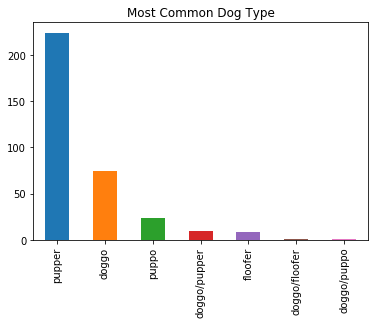

In [99]:
master_df['combined'].value_counts().plot(kind='bar', title = 'Most Common Dog Type');
plt.savefig('most_common_type.png', bbox_inches='tight')

### Insight #1:
It seems that the most common dog type is the pupper dog type, followed by the doggo and puppo respectivly.

In [89]:
master_df.p1.value_counts()

golden_retriever             143
Labrador_retriever            90
Pembroke                      78
Chihuahua                     77
pug                           55
chow                          41
Samoyed                       40
toy_poodle                    36
Pomeranian                    34
cocker_spaniel                27
malamute                      27
Chesapeake_Bay_retriever      23
miniature_pinscher            23
French_bulldog                23
seat_belt                     20
Siberian_husky                19
German_shepherd               19
Staffordshire_bullterrier     19
Cardigan                      19
Eskimo_dog                    18
web_site                      17
beagle                        17
teddy                         16
Maltese_dog                   15
kuvasz                        15
Lakeland_terrier              15
Italian_greyhound             15
Shetland_sheepdog             14
Great_Pyrenees                14
Rottweiler                    14
          

In [90]:
master_df.p2.value_counts()

Labrador_retriever                100
golden_retriever                   87
Cardigan                           69
Chihuahua                          42
Chesapeake_Bay_retriever           40
Pomeranian                         40
French_bulldog                     39
toy_poodle                         35
Siberian_husky                     31
miniature_poodle                   31
cocker_spaniel                     29
beagle                             26
Pembroke                           25
kuvasz                             24
Eskimo_dog                         24
collie                             23
American_Staffordshire_terrier     21
Samoyed                            20
Italian_greyhound                  20
Pekinese                           20
miniature_pinscher                 19
malinois                           18
toy_terrier                        18
chow                               18
Staffordshire_bullterrier          18
Boston_bull                        17
pug         

In [91]:
master_df.p3.value_counts()

Labrador_retriever                75
Chihuahua                         53
golden_retriever                  43
Eskimo_dog                        34
kelpie                            33
kuvasz                            32
Staffordshire_bullterrier         31
cocker_spaniel                    31
chow                              30
beagle                            29
Pembroke                          26
Pekinese                          26
Great_Pyrenees                    26
malamute                          24
toy_poodle                        24
Pomeranian                        24
Chesapeake_Bay_retriever          23
American_Staffordshire_terrier    22
French_bulldog                    21
pug                               21
Cardigan                          19
basenji                           19
toy_terrier                       19
bull_mastiff                      19
Siberian_husky                    17
Boston_bull                       16
doormat                           15
S

### Insight #2:
The Labrador Retriever is the most common dog bread to be identifed by the three algorithems, this is either because the data is biased to this dog bread which means the algorithms are precise, or the three algorithems are more likely to mistakingly brand a dog of a different bread as the Labrador Retriever.  

In [92]:
# master_df['year_month'] = pd.to_datetime(master_df['timestamp']).dt.to_period('M')
# master_df['year_month']= pd.to_datetime(master_df['year_month'])
# master_df['timestamp']= pd.to_datetime(master_df['timestamp'])
# master_df['year_month'] = master_df['timestamp'].dt.to_period('M')
# master_df['year_month'] =master_df['year_month'].dt.to_timestamp()

In [93]:
master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 27 columns):
tweet_id                      1894 non-null int64
in_reply_to_status_id         74 non-null float64
in_reply_to_user_id           74 non-null float64
timestamp                     1894 non-null object
source                        1894 non-null object
text                          1894 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null float64
expanded_urls                 1839 non-null object
rating_numerator              1894 non-null float64
rating_denominator            1894 non-null int64
name                          1241 non-null object
combined                      344 non-null object
jpg_url                       1894 non-null object
img_num                       1894 non-null int64
p1                            1894 non-null object
p1_conf                       1894 no

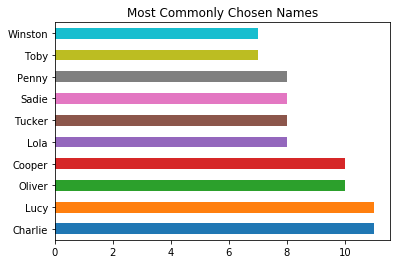

In [106]:

# x = master_df['timestamp']
# y = master_df['favorite_count']                    
# plt.figure(figsize=(12, 8))
# plt.scatter(x, y, alpha=1,label="Favorited Tweet")
# plt.xlabel("Time")
# plt.ylabel("Favorite Count")
# plt.legend(loc='upper left')
# plt.savefig('time_vs_favorite.png', bbox_inches='tight')
# plt.show()

master_df.name.value_counts().head(10).plot(kind='barh', title = 'Most Commonly Chosen Names');
plt.savefig('most_common_names.png', bbox_inches='tight')

## Insight #3:
It seems that the most chosen dog names Lucy and Charlie, followed by Oliver and Cooper respectively. However, we can't conclude that these are the names that people are more likely to call their dogs with. Maybe it is due to data bias. We don't really know.

# Refrences:

https://stackoverflow.com/questions/31328861/python-pandas-replacing-header-with-top-row

https://stackoverflow.com/questions/53680151/converting-a-json-dictionary-into-a-dataframe

https://stackoverflow.com/questions/49831596/pandas-convert-object-to-type-that-able-to-do-calculation

https://stackoverflow.com/questions/16923281/writing-a-pandas-dataframe-to-csv-file

https://stackoverflow.com/questions/45846189/how-to-delete-all-columns-in-dataframe-except-certain-ones

https://www.geeksforgeeks.org/convert-the-column-type-from-string-to-datetime-format-in-pandas-dataframe/

https://stackoverflow.com/questions/23307301/replacing-column-values-in-a-pandas-dataframe

https://kite.com/python/answers/how-to-convert-a-pandas-dataframe-column-from-object-to-int-in-python

https://stackoverflow.com/questions/17383094/how-can-i-map-true-false-to-1-0-in-a-pandas-dataframe

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.round.html

https://medium.com/analytics-vidhya/dealing-with-missing-values-nan-and-none-in-python-6fc9b8fb4f31

https://thispointer.com/pandas-check-if-a-value-exists-in-a-dataframe-using-in-not-in-operator-isin/

https://stackoverflow.com/questions/13411544/delete-column-from-pandas-dataframe

https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

https://www.kite.com/python/answers/how-to-join-three-pandas-dataframe-on-one-column-in-python

https://stackoverflow.com/questions/39291499/how-to-concatenate-multiple-column-values-into-a-single-column-in-panda-datafram

https://stackoverflow.com/questions/41449555/pandas-combine-two-columns-with-null-values

https://stackoverflow.com/questions/25792086/pandas-merge-return-empty-dataframe

https://stackoverflow.com/questions/25146121/extracting-just-month-and-year-separately-from-pandas-datetime-column

https://kanoki.org/2019/11/12/how-to-use-regex-in-pandas/

In [108]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'wrangle_act.ipynb'])

0